In [2]:
# prevent unnecessary display of IPython warnings
import warnings
warnings.filterwarnings('ignore')

# import necessary libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

# initialize main DataFrame
hist_df = pd.DataFrame(columns=['Date'])

# use SimpleImputer for filling missing data by taking the mean of the previous and following data points
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# define stock/ETF ticker symbols for analysis
symbols = ['AAPL','AMZN','DIA','FB','MSFT','NFLX','SPY','TSLA','TWTR','XOM']


# Perform the following for every ticker symbol
for s in symbols:
    
    sym_df = pd.read_csv(s+'.csv') # Read in the source data as a DataFrame
    
    print('\n'+s) # Print ticker symbol
    
    sym_df.info() # Use .info() method to find missing data
    
    # Display number of missing values BEFORE imputing
    print('\n'+'There are {} missing values before imputing.'.format(sym_df.isnull().sum().sum())+'\n')
    
    # Fit and fill missing data using SimpleImputer
    imp_mean.fit(sym_df[['Open', 'High', 'Low', 'Close', 'Adj Close']])
    imp_df = pd.DataFrame(imp_mean.transform(sym_df[['Open', 'High', 'Low', 'Close', 'Adj Close']]))
    
    # Display number of missing values AFTER imputing
    print('There are {} missing values after imputing.'.format(imp_df.isnull().sum().sum())+'\n')
    
    # Rename imputed DataFrame
    imp_df.rename(columns={0:'Open',
                           1:'High',
                           2:'Low',
                           3:'Close',
                           4:'Adj Close'}, inplace=True)
    
    # Convert Date object column to Datetime data type
    imp_df['Date'] = pd.to_datetime(sym_df.Date)
    
    # Add Symbol column to clarify which data belongs to which symbol
    imp_df['Symbol'] = s
    
    # Append imputed DataFrame to main DataFrame
    hist_df = hist_df.append(imp_df,sort=False)

# Set index for main DataFrame as Date for Time Series plots
hist_df.set_index('Date',inplace=True)


AAPL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 7 columns):
Date         10009 non-null object
Open         10008 non-null float64
High         10008 non-null float64
Low          10008 non-null float64
Close        10008 non-null float64
Adj Close    10008 non-null float64
Volume       10008 non-null float64
dtypes: float64(6), object(1)
memory usage: 547.5+ KB

There are 6 missing values before imputing.

There are 0 missing values after imputing.


AMZN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 7 columns):
Date         5858 non-null object
Open         5858 non-null float64
High         5858 non-null float64
Low          5858 non-null float64
Close        5858 non-null float64
Adj Close    5858 non-null float64
Volume       5858 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 320.5+ KB

There are 0 missing values before imputing.

There are 0 missing values 

In [2]:
hist_df # Display main DataFrame

,Open,High,Low,Close,Adj Close,Symbol,Num_Days
Date,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.404953,AAPL,0.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.383825,AAPL,3.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.355655,AAPL,4.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.364458,AAPL,5.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375022,AAPL,6.0
...,...,...,...,...,...,...,...
2020-08-06,43.400002,43.900002,43.250000,43.639999,42.795731,XOM,18256.0
2020-08-07,43.230000,43.520000,42.810001,43.439999,42.599598,XOM,18257.0
2020-08-10,43.990002,44.599998,43.599998,44.509998,43.648899,XOM,18260.0


In [10]:
# Display source data summary statistics for every ticker symbol
for s in symbols:
    print('\n'+s)
    print(hist_df[hist_df.Symbol==s].describe())


AAPL
               Open          High           Low         Close     Adj Close
count  10009.000000  10009.000000  10009.000000  10009.000000  10009.000000
mean      35.721562     36.096375     35.358408     35.745151     33.580642
std       66.211866     66.946913     65.582313     66.324397     64.675001
min        0.198661      0.198661      0.196429      0.196429      0.154939
25%        1.080357      1.100446      1.055804      1.080357      0.919691
50%        1.750000      1.782857      1.720000      1.750000      1.475209
75%       38.892857     39.424286     38.500000     39.121429     33.806358
max      477.049988    499.470001    477.000000    497.480011    497.480011

AMZN
              Open         High          Low        Close    Adj Close
count  5858.000000  5858.000000  5858.000000  5858.000000  5858.000000
mean    380.419448   384.733352   375.742883   380.467606   380.467606
std     603.067205   609.532303   595.982506   603.144412   603.144412
min       1.406250  

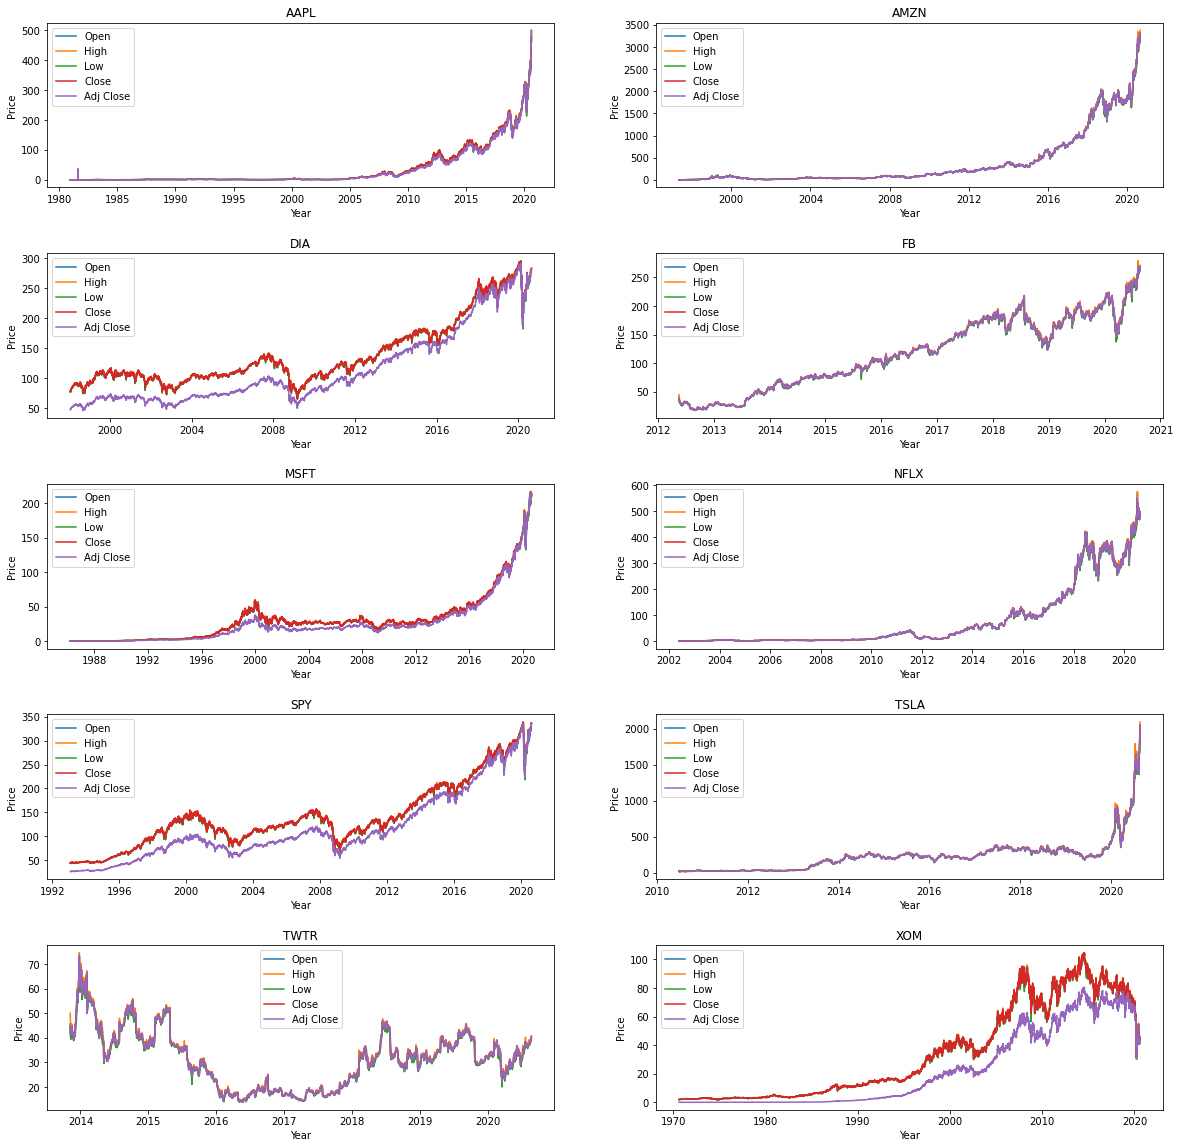

In [9]:
# Plot all pricing data (Open, High, Low, Close, Adjusted Close) for all ticker symbols
fig,i = plt.subplots(5,2,figsize=(20,20))
n = 0
for a in range(5):
    for b in range(2):
        s = symbols[n]
        for col in hist_df.columns[:5]:
            i[a][b].plot(hist_df[hist_df.Symbol==s].index,hist_df[hist_df.Symbol==s][col],label=col)
        i[a][b].legend(loc='best')
        i[a][b].set_xlabel('Year')
        i[a][b].set_ylabel('Price')
        i[a][b].set_title(s)
        n += 1
        
fig.subplots_adjust(hspace=0.4)
plt.show()

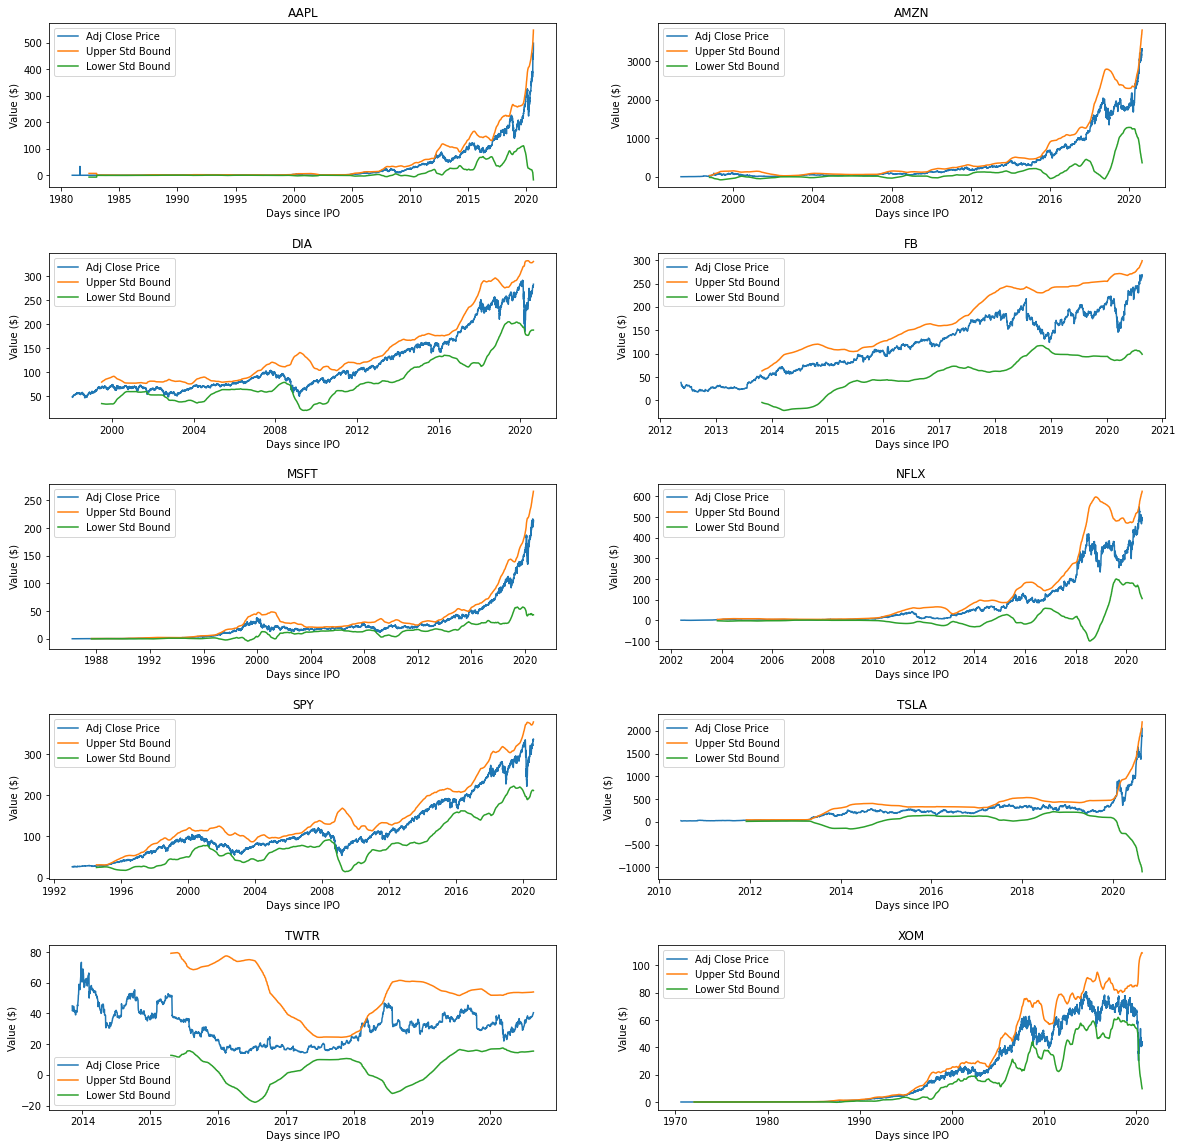

In [6]:
fig,i = plt.subplots(5,2,figsize=(20,20))
n = 0 # initialize counter for ticker symbols

# Perform the following for every ticker symbol
for a in range(5):
    for b in range(2):
        s = symbols[n]
        sym_df = hist_df[hist_df.Symbol==s] # obtain a DataFrame subset for the specified symbol
        yearly_ma = sym_df[['Adj Close']].rolling(window=365).mean() # Calculate yearly (365 day) moving avg 
        yearly_std = sym_df[['Adj Close']].rolling(window=365).std() # Calculate yearly (365 day) standard deviation
        yearly_ma['upper'] = yearly_ma['Adj Close'] + (yearly_std['Adj Close'] * 4) # Calculate upper bound four std's away from the yearly moving avg
        yearly_ma['lower'] = yearly_ma['Adj Close'] - (yearly_std['Adj Close'] * 4) # Calculate lower bound four std's away from the yearly moving avg
        yearly_ma['actual'] = sym_df['Adj Close']
        i[a][b].plot(yearly_ma.index,yearly_ma[['actual','upper','lower']]) # Plot source data along with bounds to search for outliers
        i[a][b].legend(['Adj Close Price','Upper Std Bound','Lower Std Bound'],loc='best')
        i[a][b].set_xlabel('Days since IPO')
        i[a][b].set_ylabel('Value ($)')
        i[a][b].set_title(s)
        n += 1
        
fig.subplots_adjust(hspace=0.4)
plt.show()